Context:

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Content:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
sex - student's sex (binary: 'F' - female or 'M' - male)<br>
age - student's age (numeric: from 15 to 22)<br>
address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
schoolsup - extra educational support (binary: yes or no)<br>
famsup - family educational support (binary: yes or no)<br>
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
activities - extra-curricular activities (binary: yes or no)<br>
nursery - attended nursery school (binary: yes or no)<br>
higher - wants to take higher education (binary: yes or no)<br>
internet - Internet access at home (binary: yes or no)<br>
romantic - with a romantic relationship (binary: yes or no)<br>
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
absences - number of school absences (numeric: from 0 to 93)<br>
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)
Additional note: there are several (382) students that belong to both datasets . These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

Source Information

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Fabio Pagnotta, Hossain Mohammad Amran. Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it University Of Camerino

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from pandas.tools.plotting import scatter_matrix

In [2]:
sa = pd.read_csv('student_alcohol.csv')

In [3]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [4]:
sa.shape

(395, 33)

In [5]:
sa.isnull().any().sum()

0

In [6]:
sa.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [7]:
#sa = sa.apply(pd.to_numeric, errors='coerce')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1112ea9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1152762d0>]], dtype=object)

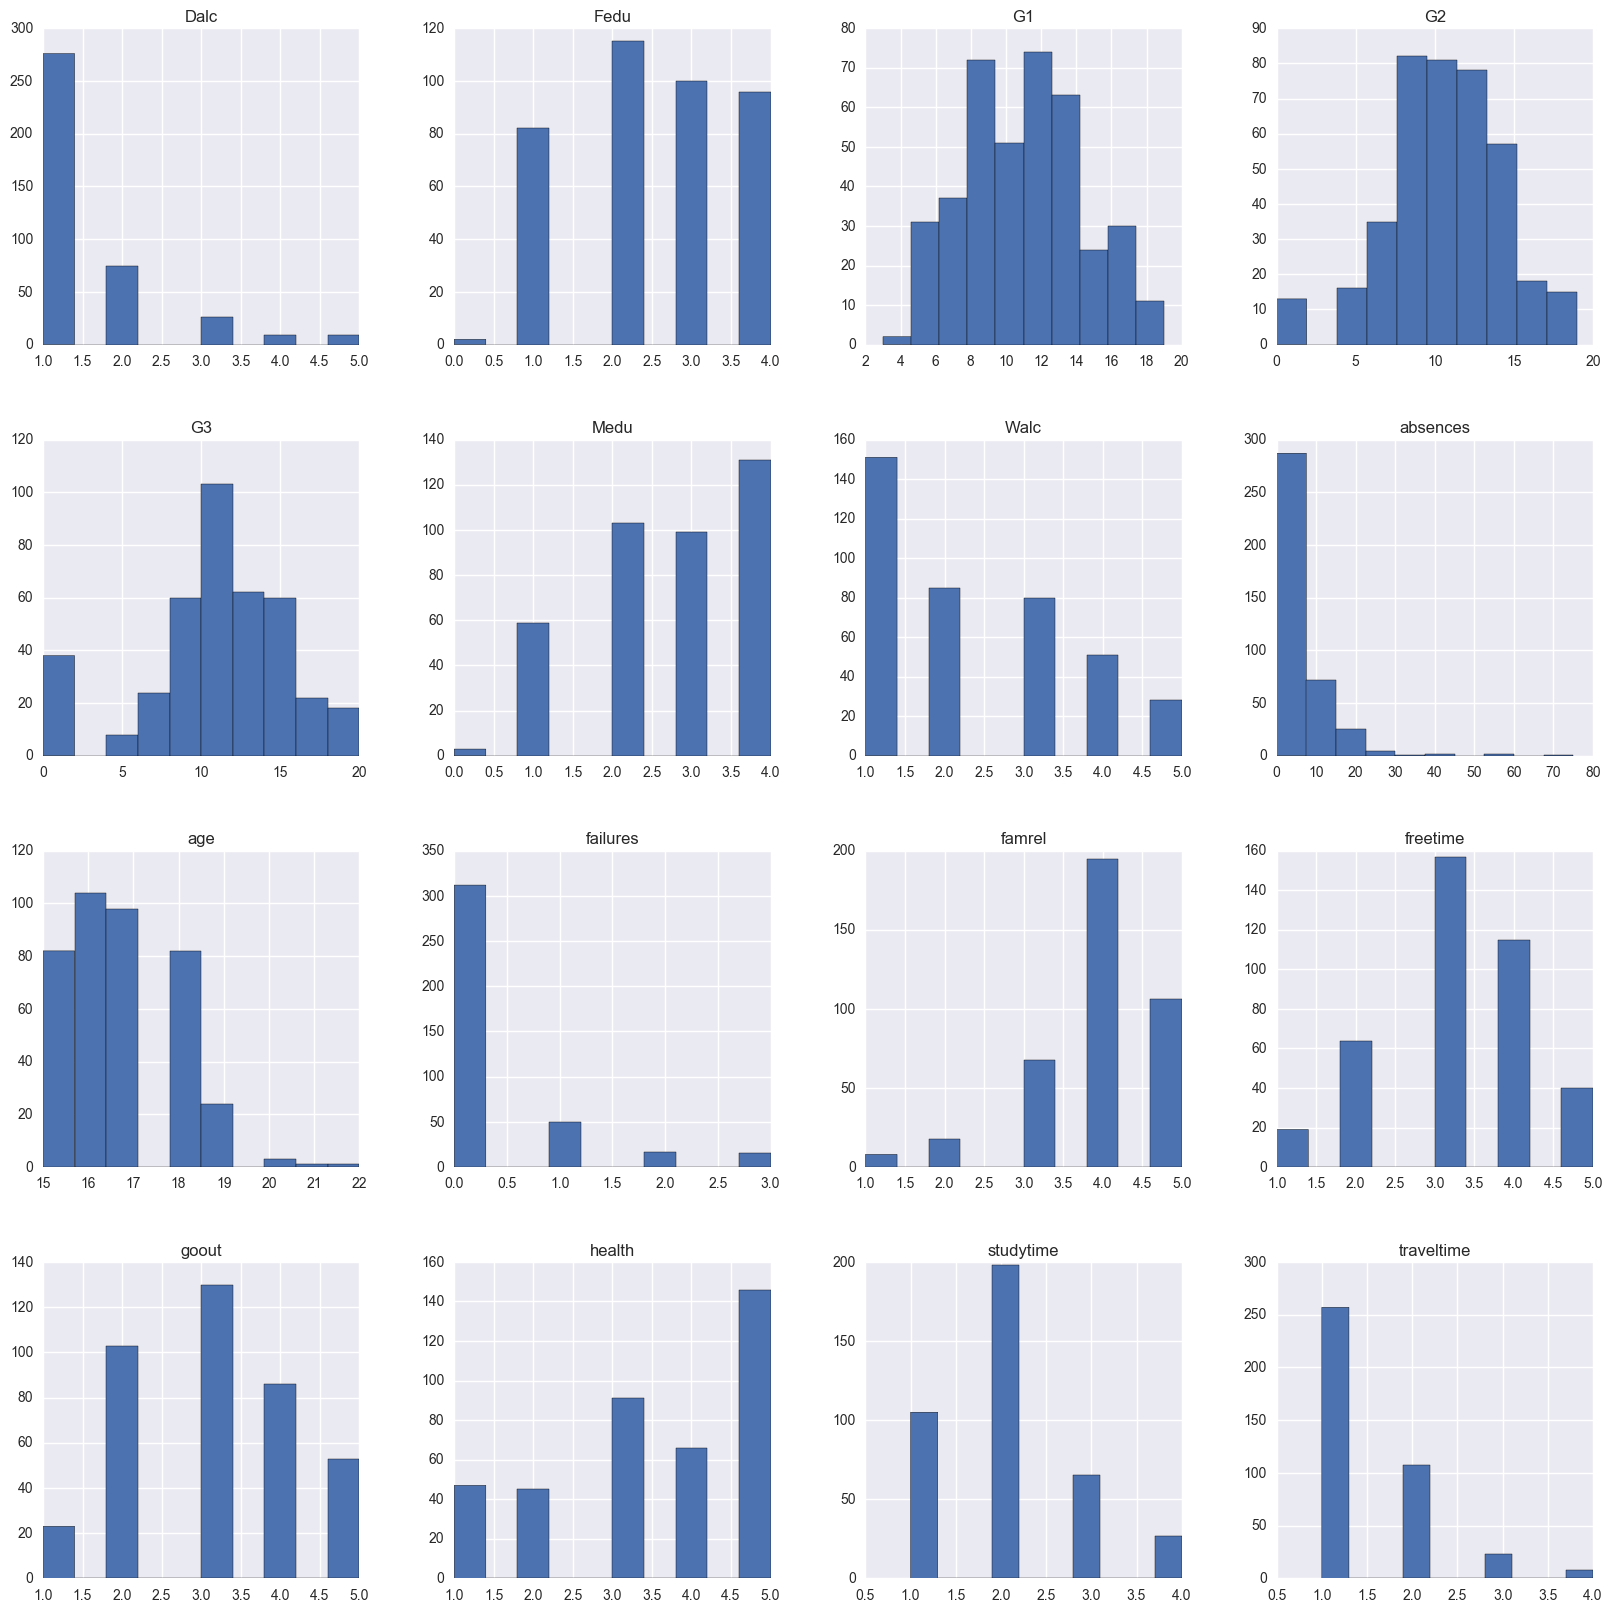

In [8]:
sa.hist(figsize = (20,20))

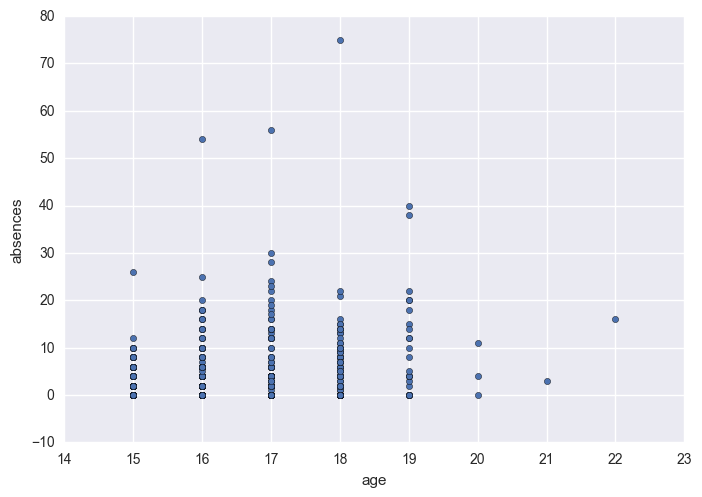

In [9]:
sa.plot.scatter(x = 'age', y = 'absences')

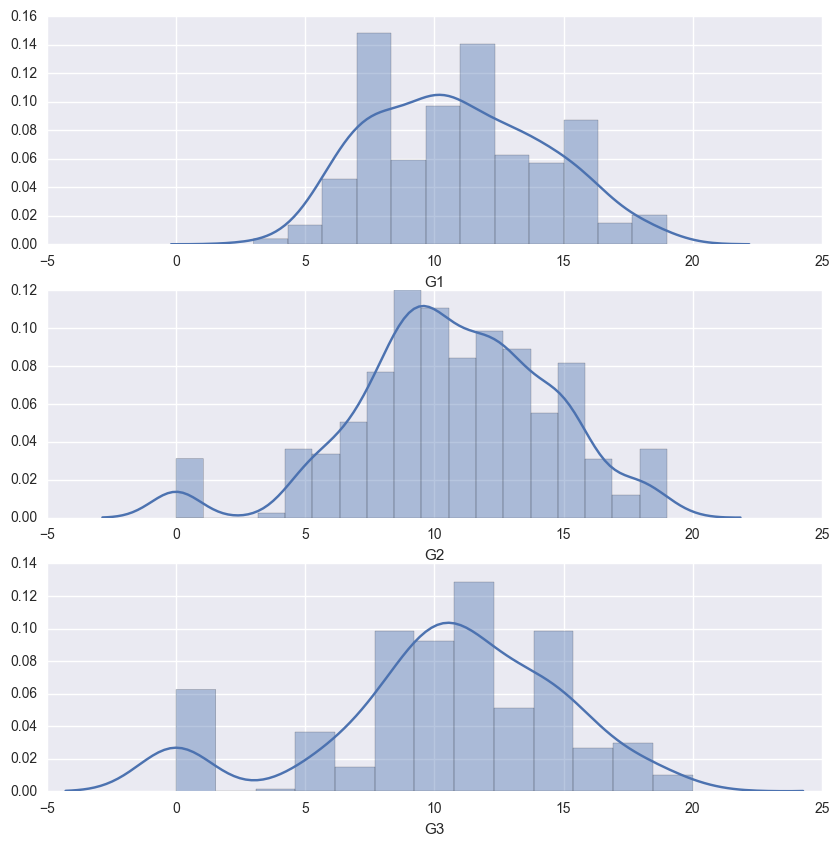

In [10]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

sb.distplot(sa.G1, ax = ax1)
sb.distplot(sa.G2, ax = ax2)
sb.distplot(sa.G3, ax = ax3)
plt.show()

Although, 21,22 and 23 are high values ages, yet, I did not want to consider them as oultiers. The data is pretty clean with no outliers. I will now go ahead and find correlations

<h4> EDA

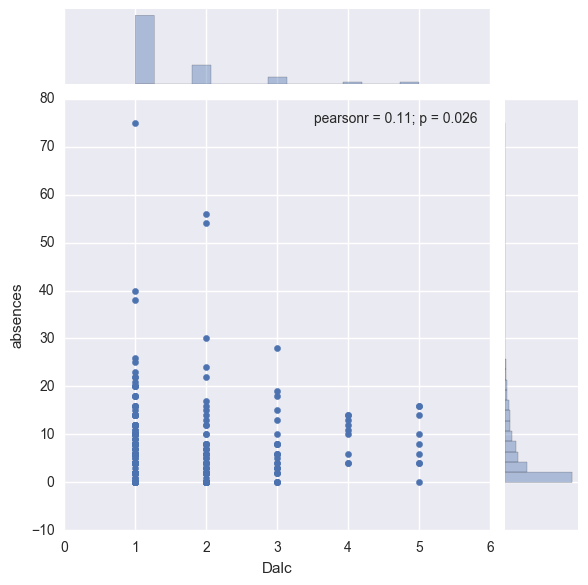

In [11]:

sb.jointplot(x="Dalc", y="absences", data=sa)


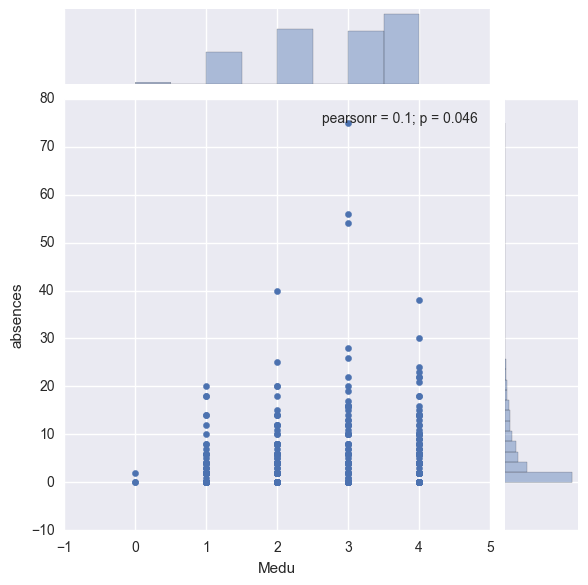

In [12]:
sb.jointplot(x="Medu", y="absences", data=sa)

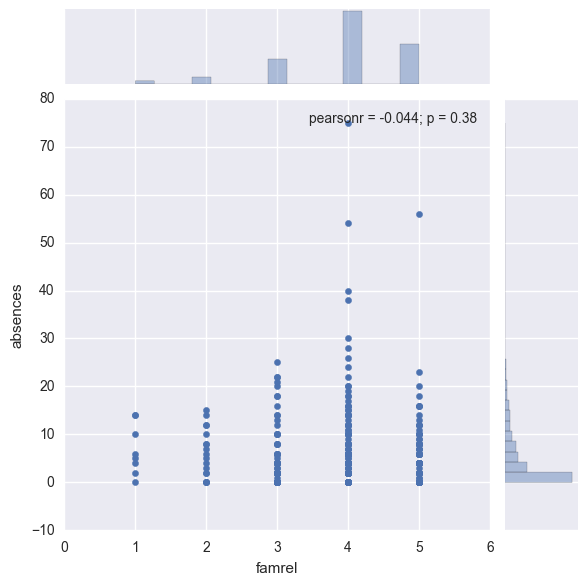

In [13]:
sb.jointplot(x="famrel", y="absences", data=sa)

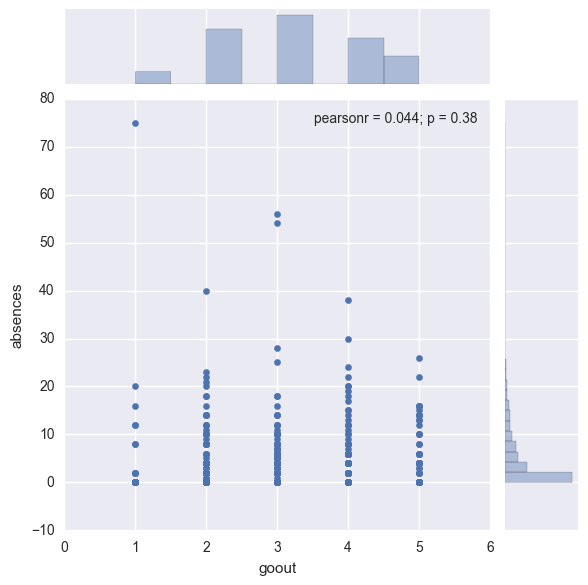

In [14]:
sb.jointplot(x="goout", y="absences", data=sa)

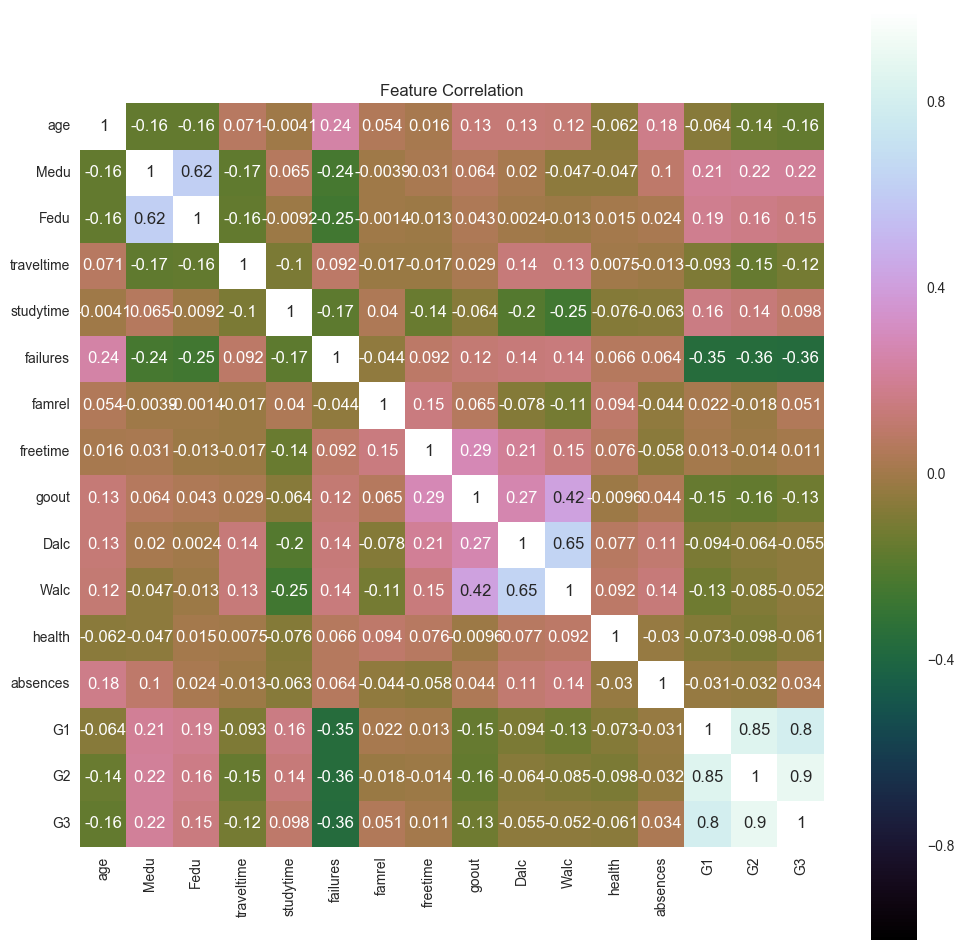

In [15]:
cor = sa.corr()
plt.figure(figsize = (12,12))
sb.heatmap(cor, vmax = 1, square = True, annot = True, cmap = 'cubehelix')
plt.title('Feature Correlation')

In [16]:
cor_Dalc = pd.DataFrame(cor['Dalc'].drop('Dalc'))
cor_Dalc.sort_values(by = 'Dalc', ascending = True)

,Dalc
studytime,-0.196019
G1,-0.094159
famrel,-0.077594
G2,-0.064120
G3,-0.054660
Fedu,0.002386
Medu,0.019834
health,0.077180
absences,0.111908
age,0.131125


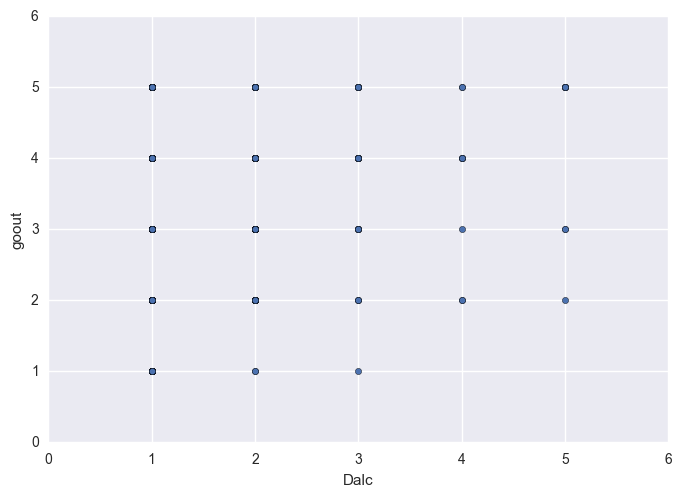

In [17]:
sa.plot.scatter(y= 'goout', x = 'Dalc')

In [18]:
cor_Walc = pd.DataFrame(cor['Walc'].drop('Walc'))
cor_Walc.sort_values(by = 'Walc', ascending = True)

,Walc
studytime,-0.253785
G1,-0.126179
famrel,-0.113397
G2,-0.084927
G3,-0.051939
Medu,-0.047123
Fedu,-0.012631
health,0.092476
age,0.117276
traveltime,0.134116


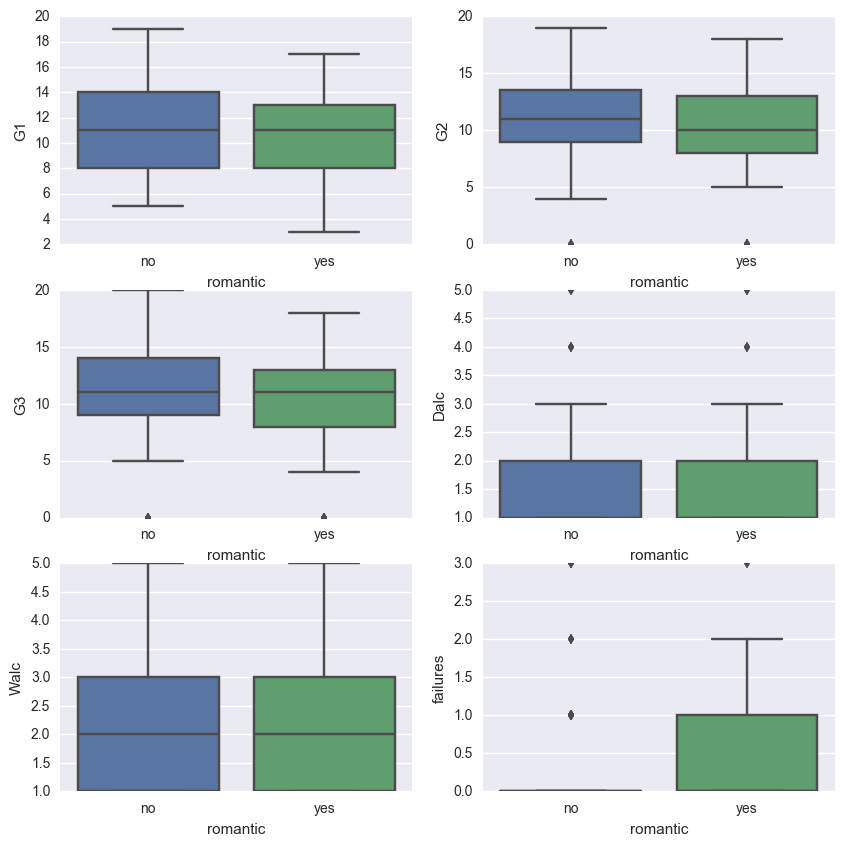

In [19]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sb.boxplot(data=sa, x="romantic", y="G1", ax = ax1)
sb.boxplot(data=sa, x="romantic", y="G2",ax = ax2)
sb.boxplot(data=sa, x="romantic", y="G3", ax = ax3)
sb.boxplot(data=sa, x="romantic", y="Dalc", ax = ax4)
sb.boxplot(data=sa, x="romantic", y="Walc", ax = ax5)
sb.boxplot(data=sa, x="romantic", y="failures", ax = ax6)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
X,y = sa[['Walc','Dalc']], sa[['G1','G1','G3']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

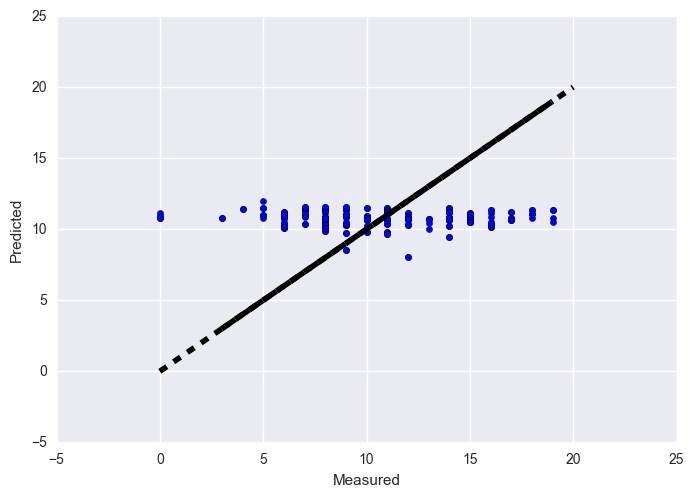

In [23]:
predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

There is not much evidence to prove that there is conncetion between student alcohol consumption and their grades.

<h3>Final Grade Prediction

In [25]:
#Regression models to predict Final grades(without best parameters)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score


In [26]:
X = sa.drop(['G3'], axis=1)
y = sa['G3']
X = pd.get_dummies(X)

In [27]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]

In [31]:
for name, clf in zip(names, clf_list):
    print(name)
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor
0.640077640449
LinearRegression
0.784239713173
Ridge
0.785574117351
Lasso
0.809728494621


The scores are good. Now the feature importances will be taken.

<h3> Feature Importances

In [32]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [33]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature G2 (0.758287)
2. Feature absences (0.134094)
3. Feature age (0.024054)
4. Feature reason_course (0.019650)
5. Feature famrel (0.012883)
6. Feature studytime (0.011406)
7. Feature G1 (0.008079)
8. Feature goout (0.006103)
9. Feature health (0.005523)
10. Feature Fjob_other (0.004975)
11. Feature failures (0.001488)
12. Feature traveltime (0.001337)
13. Feature Mjob_other (0.001048)
14. Feature Walc (0.001030)
15. Feature nursery_no (0.000938)
16. Feature Fjob_health (0.000822)
17. Feature address_U (0.000724)
18. Feature reason_reputation (0.000696)
19. Feature higher_no (0.000590)
20. Feature Mjob_at_home (0.000578)
21. Feature sex_M (0.000488)
22. Feature famsize_LE3 (0.000476)
23. Feature Fedu (0.000455)
24. Feature guardian_mother (0.000423)
25. Feature Medu (0.000422)
26. Feature freetime (0.000372)
27. Feature Dalc (0.000368)
28. Feature Mjob_teacher (0.000312)
29. Feature schoolsup_yes (0.000242)
30. Feature Pstatus_T (0.000222)
31. Feature reason_other (0.000215)
32. 

75% of the ability of algorithm is derived by G2. The rest of the features fade in importance.

I will remove the grade features fully and check out the scores of the models.

In [34]:
X = sa.drop(['G3', 'G2', 'G1'], axis=1)
X = pd.get_dummies(X)

In [36]:
for name, clf in zip(names, clf_list):
    print(name)
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor
-0.78235378134
LinearRegression
-4.28563995082e+17
Ridge
0.00829003725906
Lasso
-0.0365047676451


The scores are not good. Predicting final grades based on the features other than G1 and G2 grades is impossible. Unfortunately, it cannot be seen how alcohol is affecting the final grade.